In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Hot in Baltimore: Urban form and Temperature Variability
### Anna Scott, Darryn Waugh, Ben Zaitchik and Seth Guikema

Johns Hopkins University

January 2016

annascott@jhu.edu

This presentation can be found at: 
bit.ly/

In [8]:
from IPython.display import Image

# Heat Kills. 
#### In the US, extended periods of hot weather are the deadliest form of climate hazard.

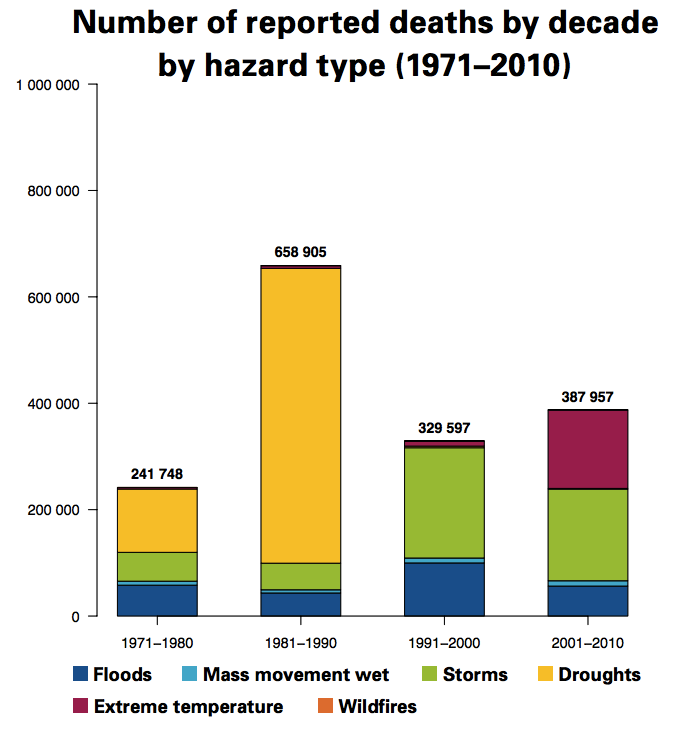

In [5]:
Image(filename='../Graphics/reported_deaths_by_climate_hazard.png')

#### Compounded with the urban heat island effect–the tendency for cities to be hotter than rural areas– rising global temperatures put urbanites at a unique risk.


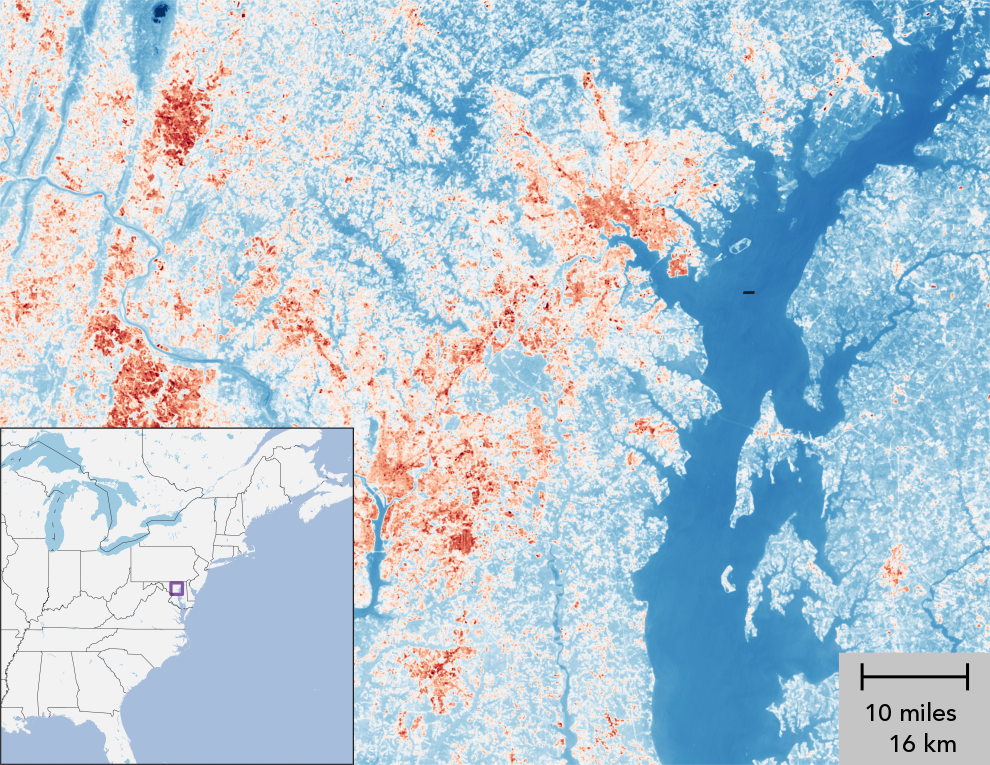

In [79]:
Image(filename='../Graphics/mapwithinset.png')

#### For health experts and local planners, an accurate assessment of local air temperature data is vital. 



## In the neediest areas, no such data exists.



#### So we measured it  using a custom network of 160 iButton thermometer/hygrometers accurate to .5 $^\circ $ C 

The buttons are inside a custom radiation shield: 

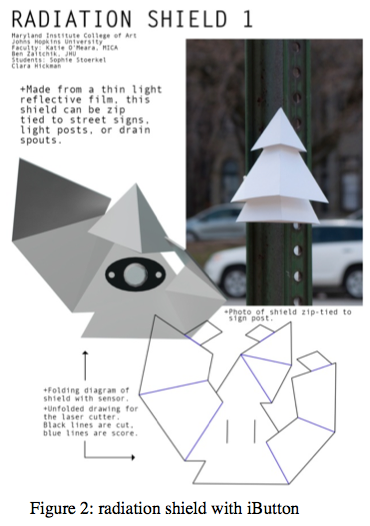

In [16]:
# insert picture of radiation shield
Image(filename = '../Graphics/radiationshields.png')

They're installed on street trees, poles, or posts, as available. 

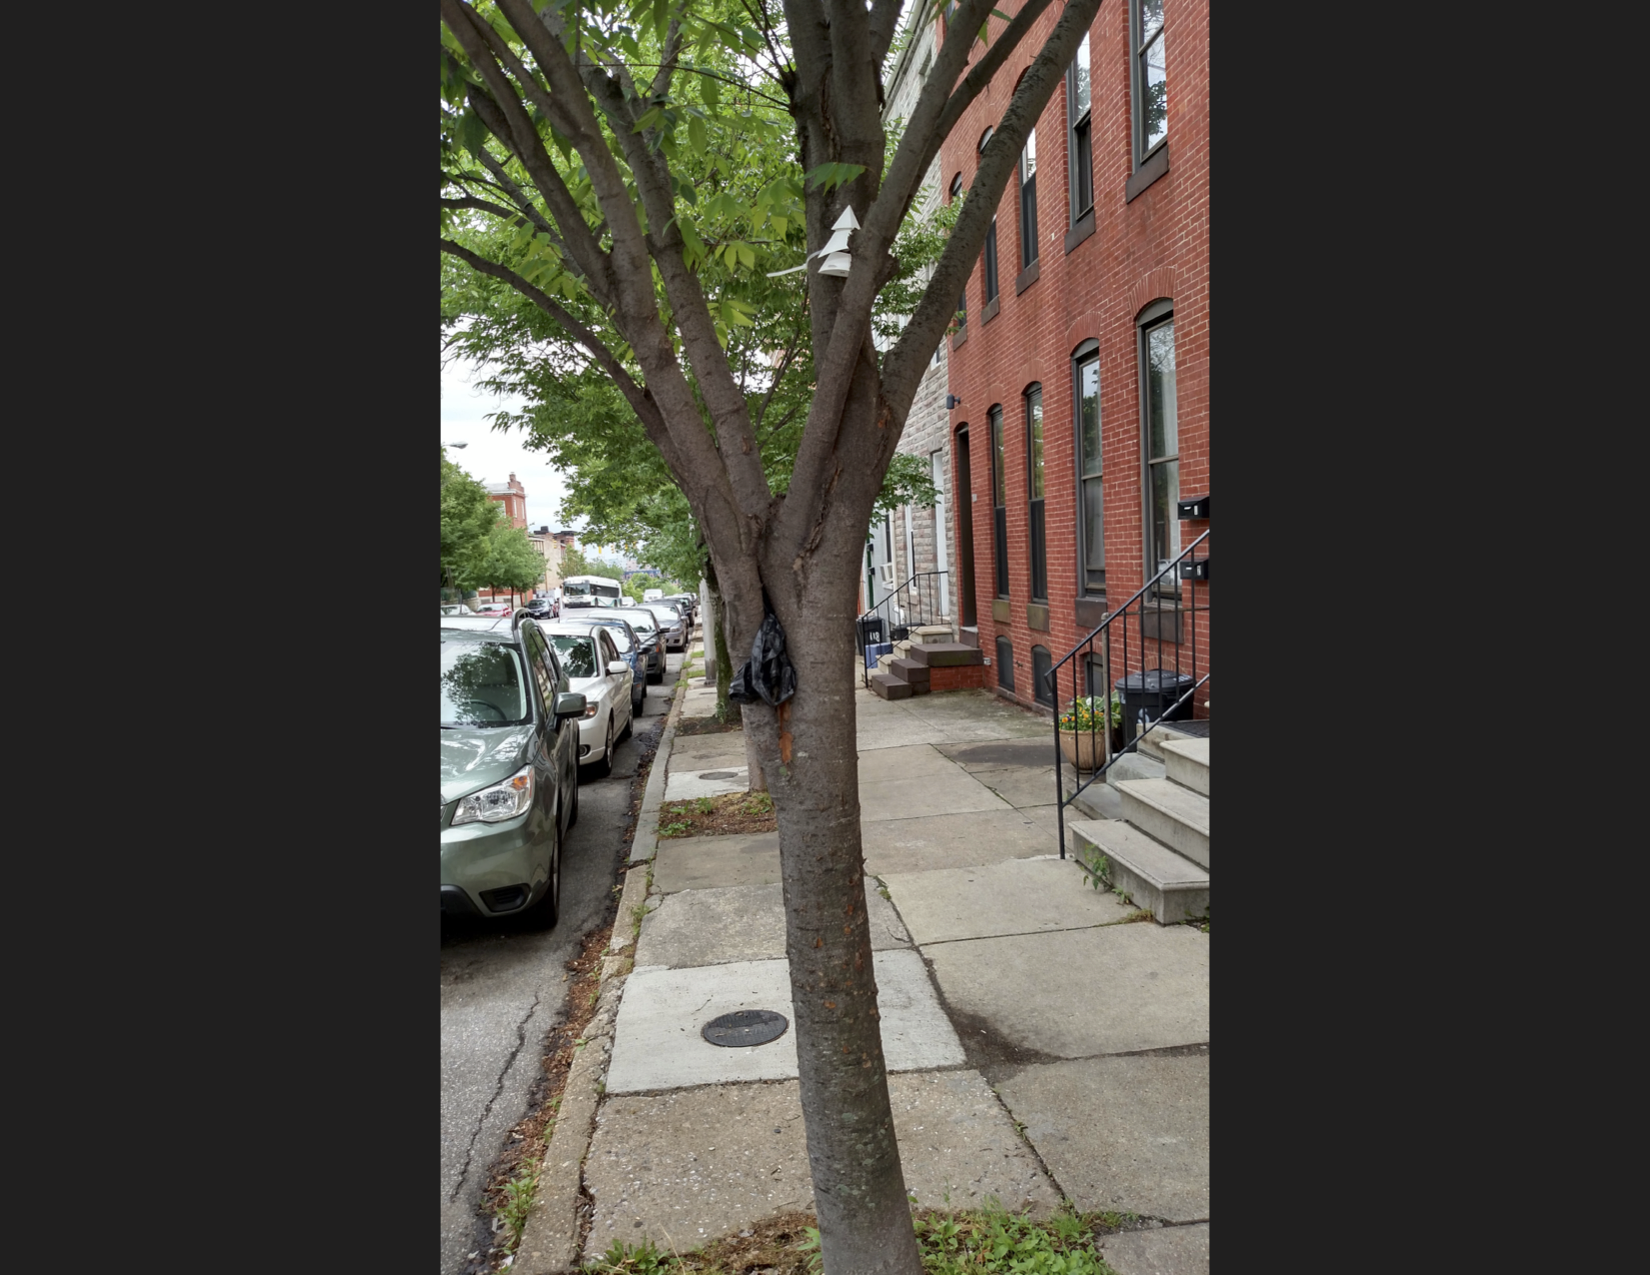

In [17]:
# insert sample pictures of buttons installed
Image(filename='../Graphics/ibuttonontree.png')

The results were validated against a NOAA station and a Vantage Pro-2 station. 

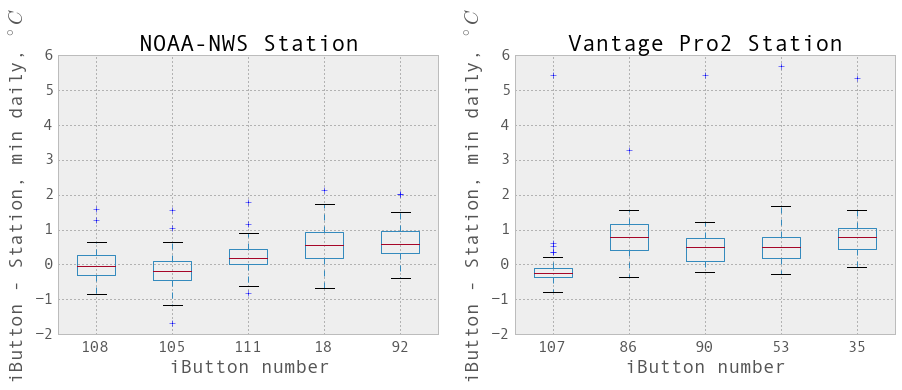

In [24]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,2)
n = [107, 86, 90, 53, 35]
data = tempDF[startdate:enddate][n].resample('D', how = 'min') - np.tile(olinhalldf[startdate:enddate].resample('D', how = 'min').outTemp, [tempDF[startdate:enddate][n].resample('D', how = 'min').shape[1],1]).T
handle = data.boxplot(return_type='axes')
plt.xlabel('iButton number')
plt.ylabel('iButton - Station, min daily, $ ^\circ C$')
plt.title('Vantage Pro2 Station')
a = plt.ylim([-2, 6])

plt.subplot(1,2,1)
m = [108, 105, 111, 18, 92]
data = tempDF[startdate:enddate][m].resample('D', how = 'min') - np.tile(urbandf[startdate:enddate].resample('D', how = 'min').TEMP, [tempDF[startdate:enddate][m].resample('D', how = 'min').shape[1],1]).T
handle = data.boxplot(return_type='axes')
plt.xlabel('iButton number')
plt.ylabel('iButton - Station, min daily, $ ^\circ C$')
plt.title('NOAA-NWS Station')
a = plt.ylim([-2, 6])

2 NOAA stations, urban & rural, were used for comparison.

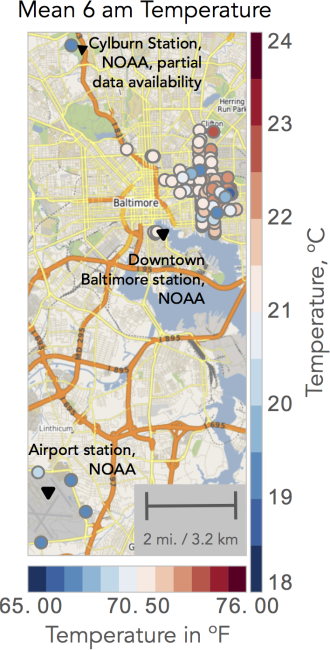

In [15]:
#Image(filename='../Graphics/annotatedmeantempmap6am.png')
Image(filename = '../Graphics/longmap.png')

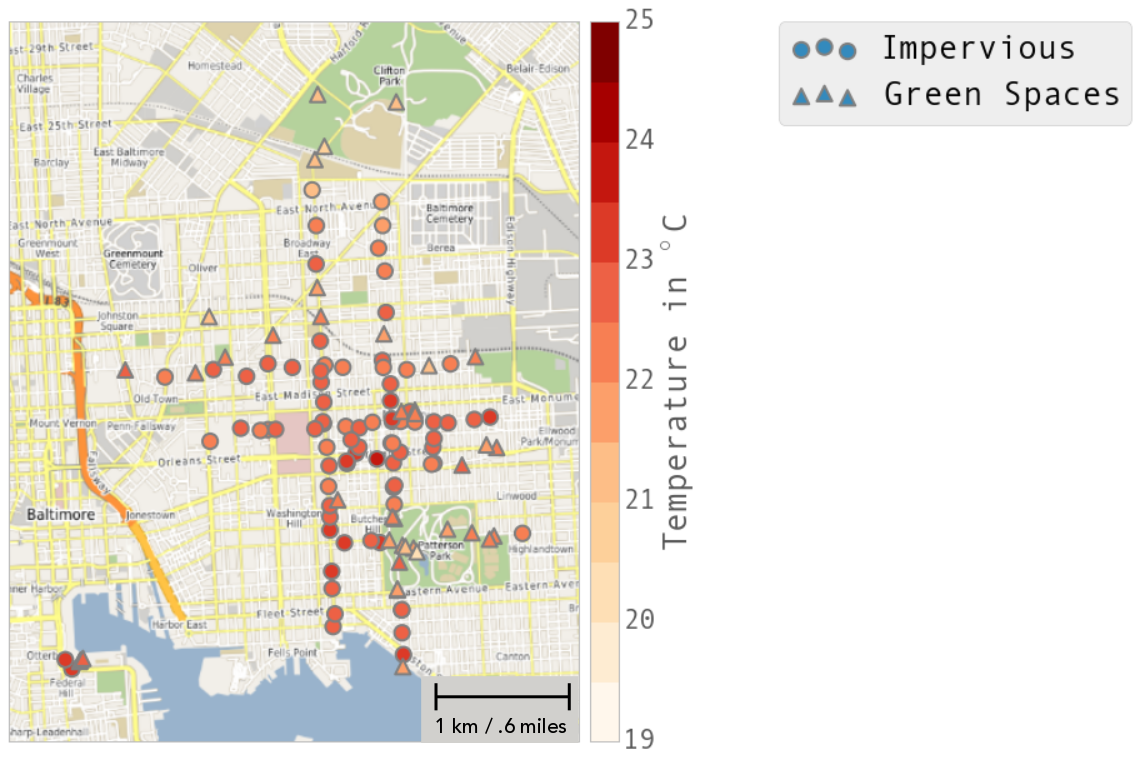

In [45]:
Image(filename='../Graphics/mapmean2.png')

## Results show that vegetated or green spaces are cooler than impervious spaces by .8 $^\circ C$ at night

Significant variability is also present within the city: $\sigma = 2.2 ^\circ C $

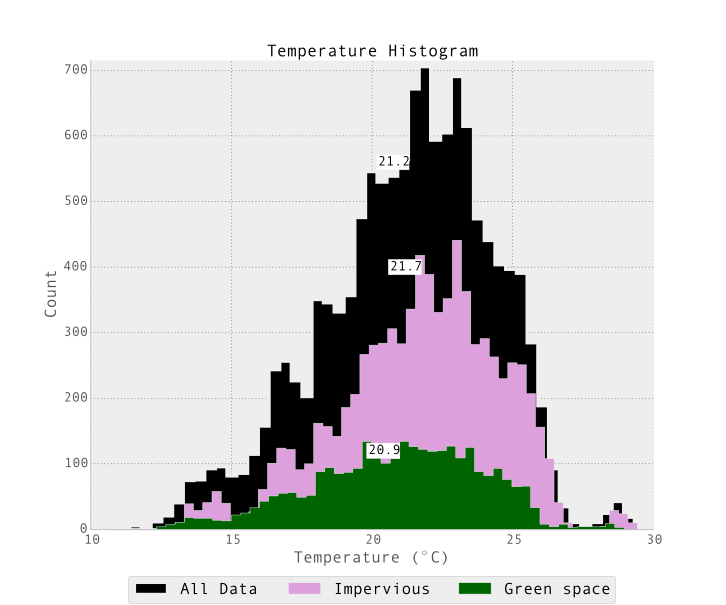

In [33]:
# show histogram
Image(filename='../Graphics/histogram.png')

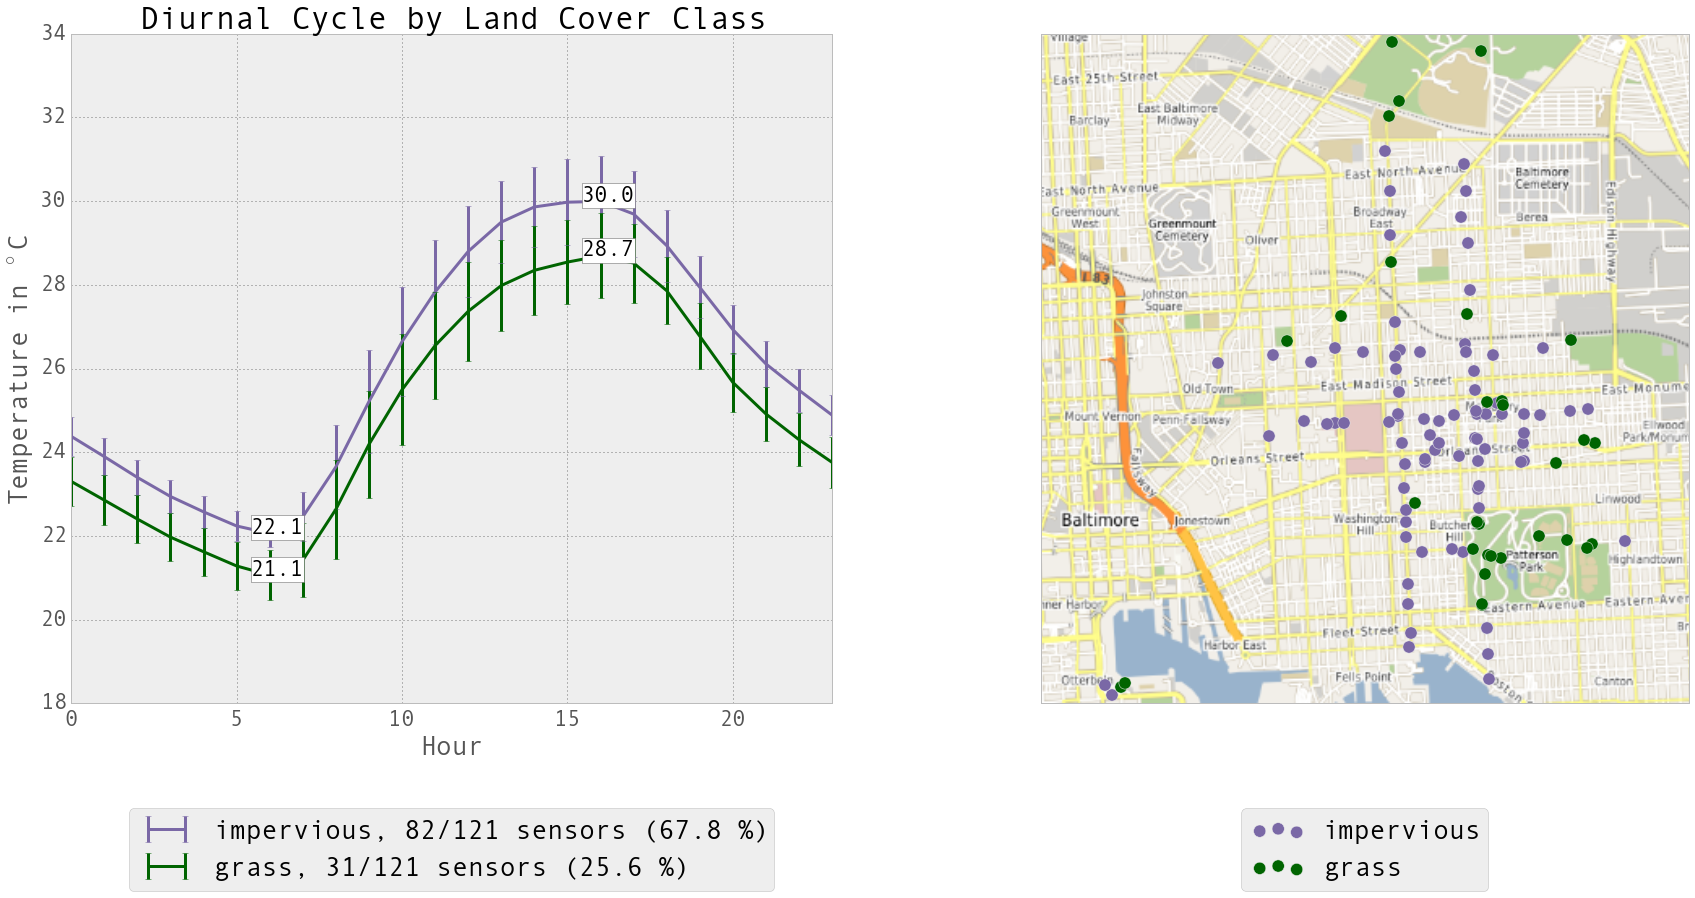

In [35]:
# diurnal cycle
Image(filename='../Graphics/diurnalplot.png')

#### Additionally, temperatures around parks are cooler. 

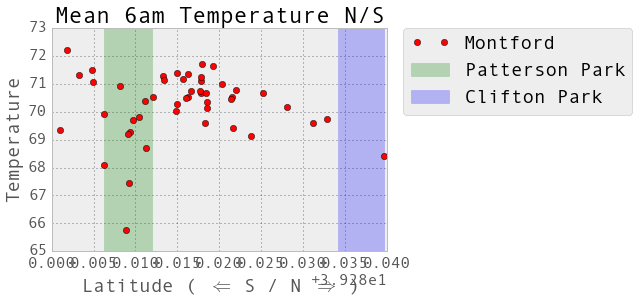

In [29]:
Image(filename='../Graphics/Montfordtransect.png')

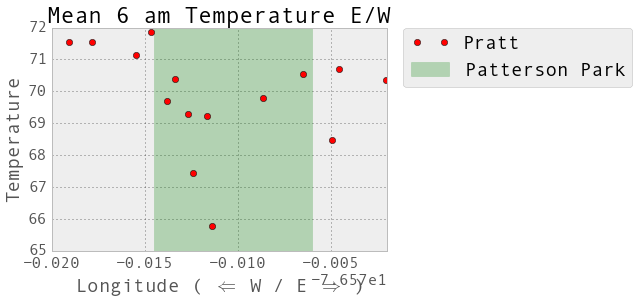

In [31]:
Image(filename='../Graphics/PrattPattersonParktransect.png')

## Furthermore, during heatwave periods, no significant change in UHI is measured. 

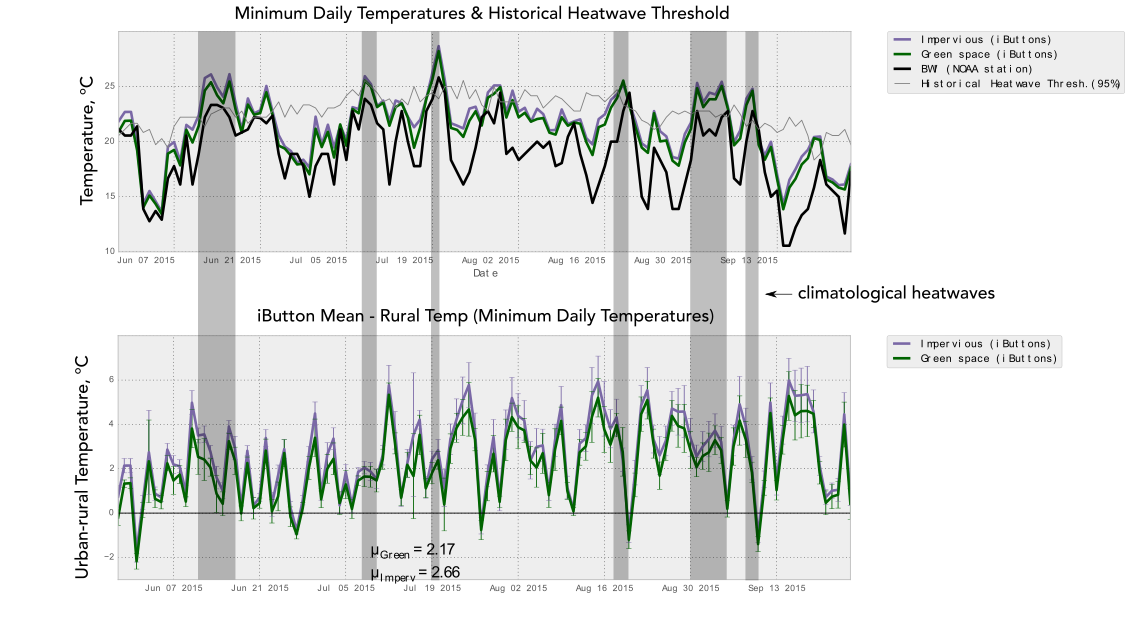

In [17]:
Image(filename='../Graphics/biplot.png') 

## What's the connection with other variables?


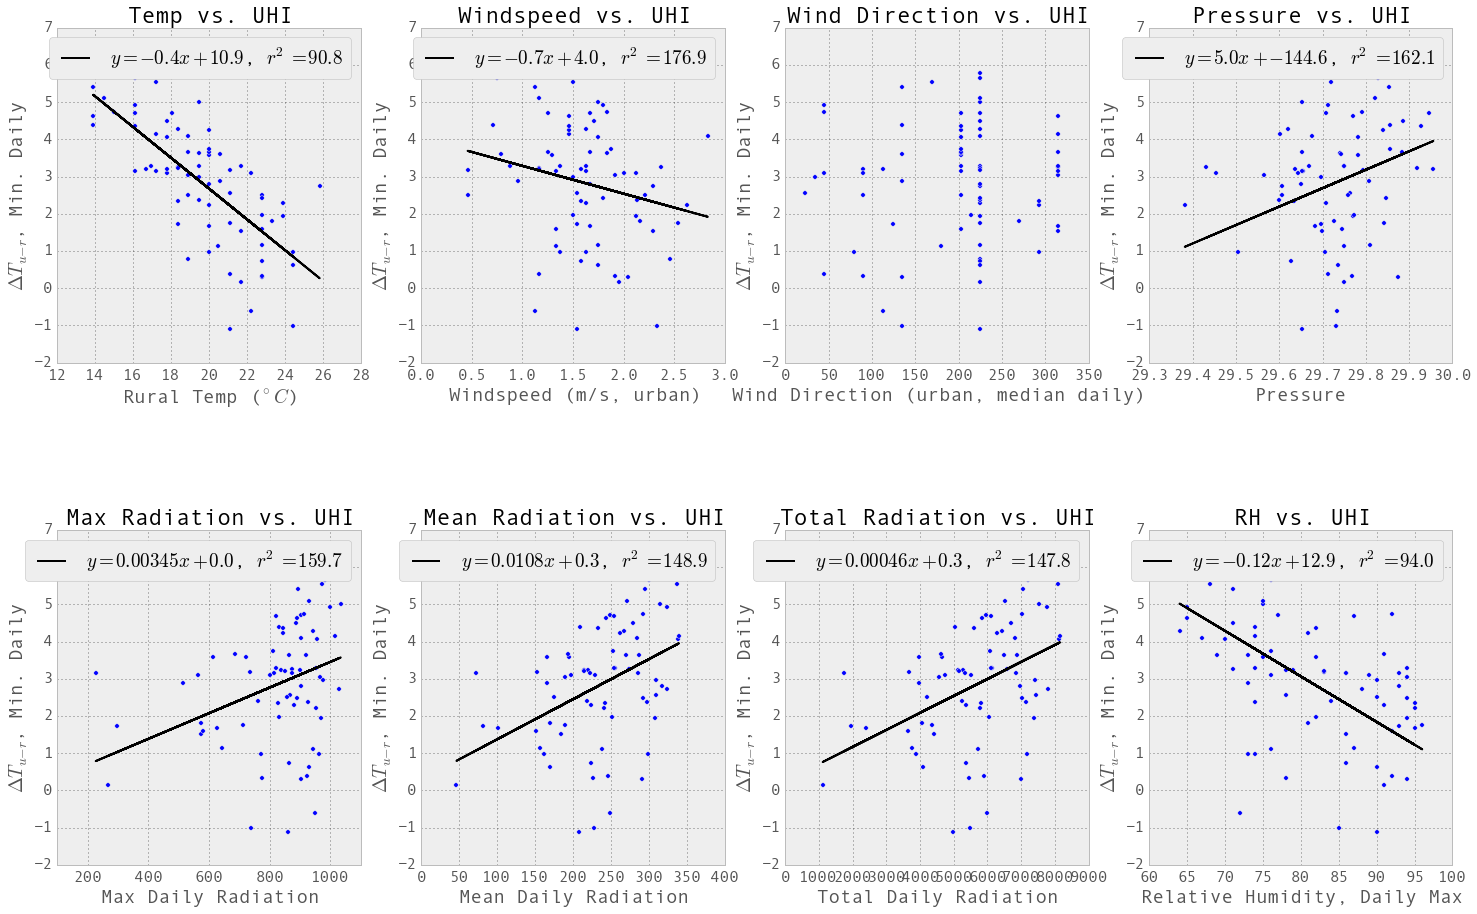

In [32]:
#regression between measured UHI and other variables
diff = tempDF[startdate:enddate][selected].resample('D', how = 'min') - np.tile(ruraldf[startdate:enddate].resample('D', how = 'min').TEMP, [tempDF[startdate:enddate][selected].resample('D', how = 'min').shape[1],1]).T

# temp vs. uhi
plt.figure(figsize=[25,15])

plt.subplot(2,4,1)
x = ruraldf[startdate:enddate].resample('D', how = 'min').TEMP
y = diff.mean(axis=1)
plt.scatter(x, y)
index = ~np.isnan(x) & ~np.isnan(y)
#m,b = np.polyfit(x[index],y[index],1)
p, res, _, _, _ = np.polyfit(x[index],y[index],1, full= True)
m = p[0]
b= p[1]
plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
             lw =2,
             label = '$y=%.1f x +%.1f$, $r^2 = %2.1f$'%(m,b,res),
             )
plt.legend()
plt.title('Temp vs. UHI')
plt.xlabel('Rural Temp ($^\circ C$)')
plt.ylabel('$\Delta T_{u-r}$, Min. Daily')

# windspeed vs. uhi
plt.subplot(2,4,2)
x = amazinggracedf[startdate:enddate].windSpeed.resample('D', how = 'mean')
y = diff.mean(axis=1)
plt.scatter(x, y)
index = ~np.isnan(x) & ~np.isnan(y)
p, res, _, _, _ = np.polyfit(x[index],y[index],1, full= True)
m = p[0]
b= p[1]
plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
             lw =2,
             label = '$y=%.1f x +%.1f$, $r^2 = %2.1f$'%(m,b,res),
             )
plt.legend()
plt.xlabel('Windspeed (m/s, urban)')
plt.ylabel('$\Delta T_{u-r}$, Min. Daily')
plt.title('Windspeed vs. UHI')

# wind direction vs. uhi
plt.subplot(2,4,3)
x = amazinggracedf[startdate:enddate].windDir.resample('D', how = 'median')
plt.scatter(x, y)
plt.xlabel('Wind Direction (urban, median daily)')
plt.ylabel('$\Delta T_{u-r}$, Min. Daily')
plt.title('Wind Direction vs. UHI')

# pressure vs. uhi
plt.subplot(2,4,4)
x = amazinggracedf[startdate:enddate].pressure.resample('D', how = 'mean')
plt.scatter(x[0:-1], y[1:])
index = ~np.isnan(x) & ~np.isnan(y)
#m,b = np.polyfit(x[index],y[index],1)
p, res, _, _, _ = np.polyfit(x[index],y[index],1, full= True)
m = p[0]
b= p[1]
plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
             lw =2,
             label = '$y=%.1f x +%.1f$, $r^2 = %2.1f$'%(m,b,res),
             )
plt.legend()
plt.xlabel('Pressure')
plt.ylabel('$\Delta T_{u-r}$, Min. Daily')
plt.title('Pressure vs. UHI')

# max radiation vs. uhi
plt.subplot(2,4,5)
x = amazinggracedf[startdate:enddate].radiation.resample('D', how = 'max')
plt.scatter(x[0:-1], y[1:])
index = ~np.isnan(x) & ~np.isnan(y)
#m,b = np.polyfit(x[index],y[index],1)
p, res, _, _, _ = np.polyfit(x[index],y[index],1, full= True)
m = p[0]
b= p[1]
plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
             lw =2,
             label = '$y=%.5f x +%.1f$, $r^2 = %2.1f$'%(m,b,res),
             )
plt.legend()
plt.xlabel('Max Daily Radiation')
plt.ylabel('$\Delta T_{u-r}$, Min. Daily')
plt.title('Max Radiation vs. UHI')

# mean radiation vs. uhi
plt.subplot(2,4,6)
x = amazinggracedf[startdate:enddate].radiation.resample('D', how = 'mean')
plt.scatter(x[0:-1], y[1:])
index = ~np.isnan(x) & ~np.isnan(y)
#m,b = np.polyfit(x[index],y[index],1)
p, res, _, _, _ = np.polyfit(x[index],y[index],1, full= True)
m = p[0]
b= p[1]
plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
             lw =2,
             label = '$y=%.4f x +%.1f$, $r^2 = %2.1f$'%(m,b,res),
             )
plt.legend()
plt.xlabel('Mean Daily Radiation')
plt.ylabel('$\Delta T_{u-r}$, Min. Daily')
plt.title('Mean Radiation vs. UHI')

# total radiation vs. uhi
plt.subplot(2,4,7)
x = amazinggracedf[startdate:enddate].radiation.resample('D', how = 'sum')
plt.scatter(x[0:-1], y[1:])
index = ~np.isnan(x) & ~np.isnan(y)
#m,b = np.polyfit(x[index],y[index],1)
p, res, _, _, _ = np.polyfit(x[index],y[index],1, full= True)
m = p[0]
b= p[1]
plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
             lw =2,
             label = '$y=%.5f x +%.1f$, $r^2 = %2.1f$'%(m,b,res),
             )
plt.legend()
plt.xlabel('Total Daily Radiation')
plt.ylabel('$\Delta T_{u-r}$, Min. Daily')
plt.title('Total Radiation vs. UHI')

# humidity vs. uhi
plt.subplot(2,4,8)
x = amazinggracedf[startdate:enddate].outHumidity.resample('D', how = 'max')
plt.scatter(x[0:-1], y[1:])
index = ~np.isnan(x) & ~np.isnan(y)
#m,b = np.polyfit(x[index],y[index],1)
p, res, _, _, _ = np.polyfit(x[index],y[index],1, full= True)
m = p[0]
b= p[1]
plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
             lw =2,
             label = '$y=%.2f x +%.1f$, $r^2 = %2.1f$'%(m,b,res),
             )
plt.legend()
plt.xlabel('Relative Humidity, Daily Max')
plt.ylabel('$\Delta T_{u-r}$, Min. Daily')
plt.title('RH vs. UHI')

## Conclusions: 
- Minimum daily temperatures in a city can vary by upwards of 5$^\circ C$. 
- Vegetation spaces are on average cooler by .8$^\circ C$.
- During heatwaves, the UHI is not magnified.

## Thanks to: 
- NSF IGERT
- Kristen Baja and the City of Baltimore Office of Sustainability
- Johns Hopkins Department of Earth and Planetary Science Summer Research Grant

Interested? Get in touch at annascott@jhu.edu

importibuttondata.py:28: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  meta = meta.sort(axis=0) # sort the data in order of the sensor number
importibuttondata.py:63: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  anomalyDF = pd.DataFrame(anomaly, tempDF.index, tempDF.columns).sort(axis=1)
/Users/annascott2/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/annascott2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/annascott2/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns 

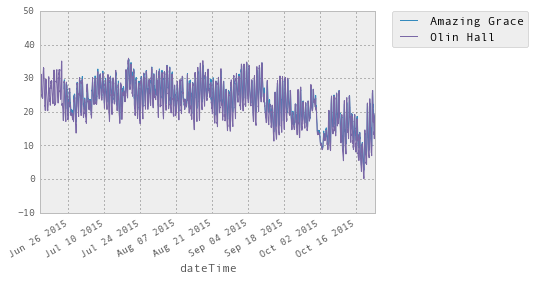

In [4]:
### Code
# import data
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
from mpl_toolkits.basemap import Basemap
pylab.rcParams['figure.figsize'] = 16, 12
pd.options.display.mpl_style = 'default'
get_ipython().magic(u'matplotlib inline')
import ibuttonplots
import importibuttondata
%matplotlib inline

files = glob.glob('./data/*[tT].csv')
meta0 = pd.DataFrame(pd.read_csv('./data/bmoremetadata.csv', sep = ','))
tempDF0, anomalyDF0, meta0 = importibuttondata.importdata(files, meta0)

#files = glob.glob('./data/*[tT].csv')
files = glob.glob('./data/falldownload/*[tT].csv')
meta1 = pd.DataFrame(pd.read_csv('./data/falldownload/TempSensorFinal_results-4.csv', sep = ','))
#meta0 = pd.DataFrame(pd.read_csv('./data/bmoremetadata.csv', sep = ','))
tempDF1, anomalyDF1, meta1 = importibuttondata.importdata(files, meta1)

frames = [tempDF0, tempDF1]
tempDF = pd.concat(frames).resample('H')
anomalyDF = pd.concat([anomalyDF0, anomalyDF1])
meta = pd.concat([meta0, meta1.loc()[np.setdiff1d(meta1.sensornumber, meta0.sensornumber)]])

# Import Science Center observation data
date_spec = {'Date': [2, 3]}
urbandf = pd.read_csv('./data/observations/urban/2138216847366dat.csv', 
                      sep = ',', 
                      parse_dates = {'Date':[2, 3]},
                      #parse_dates = ['YYYYMMDD', 'HHM'],
                      keep_date_col=True).set_index('Date')
#urbandf.Temp[urbandf.Temp == '****'] = 'NaN' # replace stars with nans
urbandf.Temp = (urbandf.Temp.astype('float')) #-32)*5/9. #change the data to float
urbandf.Temp[urbandf.Temp > 400] = 'NaN' #change unrealistic temp data to nan, data in F so 400 too high
urbandf = urbandf[~((urbandf.index.month == 2) & (urbandf.index.day == 29))] # get rid of leap years
#df.DEWP[df.DEWP == '****'] = 'NaN' # replace stars with nans
#df.DEWP = df.DEWP.astype('float') #change the data to float
urbandf = urbandf.resample('H')
urbandf.rename(columns = {'Temp' : 'TEMP'}, inplace = True)
urbandf.index = urbandf.index - pd.DateOffset(hours  = 4)

# Import hourly BWI data
date_spec = {'Date': [2]}
df = pd.read_csv('./data/observations/rural/4330976847362dat.csv', sep = ',', parse_dates = date_spec, keep_date_col=True).set_index('Date')
df.TEMP[df.TEMP == '****'] = 'NaN' # replace stars with nans
df.TEMP = (df.TEMP.astype('float')-32)*5/9. #change the data to float
df.TEMP[df.TEMP > 400] = 'NaN' #change unrealistic temp data to nan, data in F so 400 too high
df = df[~((df.index.month == 2) & (df.index.day == 29))] # get rid of leap years

df.DEWP[df.DEWP == '****'] = 'NaN' # replace stars with nans
df.DEWP = df.DEWP.astype('float') #change the data to float
ruraldf = df.resample('H')

import sqlite3
conn = sqlite3.connect('amazinggrace-weewx.sdb')
amazinggracedf = pd.read_sql_query('SELECT * from archive', conn)
amazinggracedf['dateTime']=pd.to_datetime(amazinggracedf['dateTime'], unit='s')
amazinggracedf.outTemp = (amazinggracedf.outTemp-32)*5./9.
amazinggracedf = amazinggracedf.set_index('dateTime')
amazinggracedf.index = amazinggracedf.index - pd.DateOffset(hours  = 5)

conn = sqlite3.connect('olinhall-weewx.sdb')
olinhalldf = pd.read_sql_query('SELECT * from archive', conn)
olinhalldf['dateTime']=pd.to_datetime(olinhalldf['dateTime'], unit='s')
olinhalldf.outTemp = (olinhalldf.outTemp-32)*5./9.
olinhalldf = olinhalldf.set_index('dateTime')
olinhalldf.index = olinhalldf.index - pd.DateOffset(hours  = 5)

amazinggracedf.outTemp.plot(label = 'Amazing Grace')
plt.hold(True)
olinhalldf.outTemp.plot(label = 'Olin Hall')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)

amazinggracedf = amazinggracedf[amazinggracedf.index.minute ==0]#amazinggracedf.resample('H')
olinhalldf = olinhalldf[olinhalldf.index.minute ==0]

ebaltsensorsi = np.where(meta['location:Longitude']>= -76.6125831)#-76.61)# -76.6072591 )

ebaltsensorsi = np.where(meta['location:Latitude']<= 39.32374)
parksi = np.where((meta['landcoverclass'] != 'impervious') & (meta['location:Longitude']>= -76.6125831)) # -76.61) )
plt.scatter(meta['location:Longitude'].iloc[ebaltsensorsi],
            meta['location:Latitude'].iloc[ebaltsensorsi], s = 100)
plt.scatter(meta['location:Longitude'].iloc[parksi],
            meta['location:Latitude'].iloc[parksi], color = 'g')

parksensors = meta.sensornumber.iloc[parksi]
ebaltsensors = meta.sensornumber.iloc[ebaltsensorsi]
nonparks = np.setdiff1d(ebaltsensors, parksensors)

selected = ebaltsensors

startdate = '2015-07-1' 
enddate = '2015-09-10'

In [46]:
data = tempDF[startdate:enddate].resample('D', how = 'min').values
print 'Standard deviation of all data: ', np.nanstd(data)
data = tempDF[startdate:enddate][nonparks].resample('D', how = 'min').values
print  'Standard deviation of impervious data: ', np.nanstd(data)
data = tempDF[startdate:enddate][parksensors].resample('D', how = 'min').values
print  'Standard deviation of green space data: ', np.nanstd(data)

Standard deviation of all data:  2.26316863206
Standard deviation of impervious data:  2.14183968003
Standard deviation of green space data:  2.21333625562


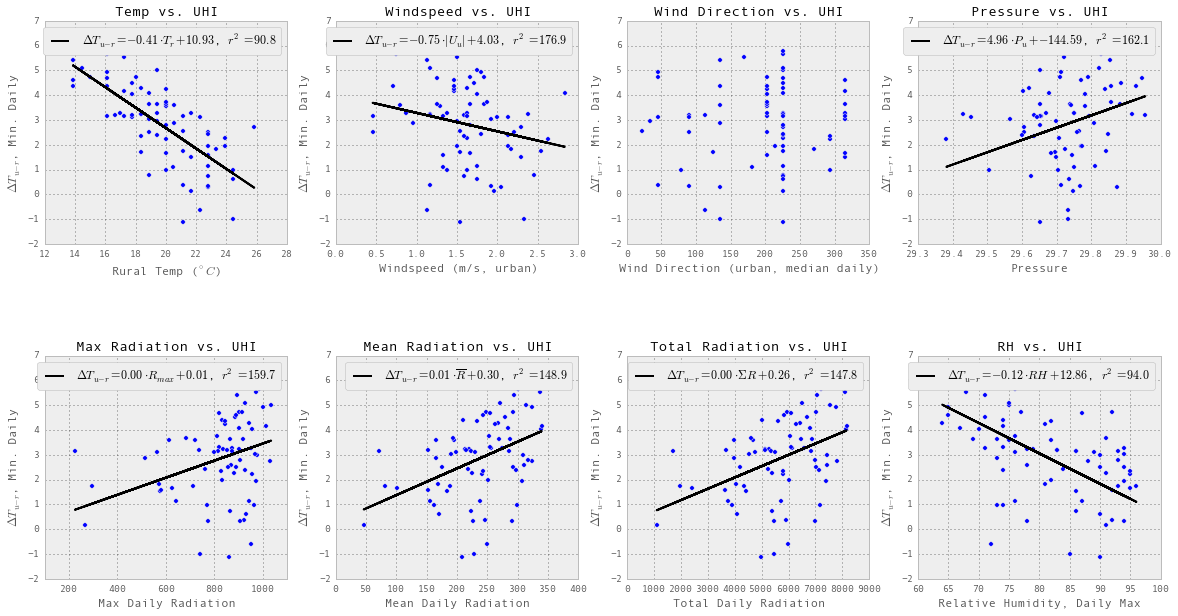

In [154]:
diff = tempDF[startdate:enddate][selected].resample('D', how = 'min') - np.tile(ruraldf[startdate:enddate].resample('D', how = 'min').TEMP, [tempDF[startdate:enddate][selected].resample('D', how = 'min').shape[1],1]).T

# temp vs. uhi
plt.figure(figsize=[20,10])

plt.subplot(2,4,1)
x = ruraldf[startdate:enddate].resample('D', how = 'min').TEMP
y = diff.mean(axis=1)
plt.scatter(x, y)
index = ~np.isnan(x) & ~np.isnan(y)
#m,b = np.polyfit(x[index],y[index],1)
p, res, _, _, _ = np.polyfit(x[index],y[index],1, full= True)
m = p[0]
b= p[1]
plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
             lw =2,
             label = '$\Delta T_{u-r}=%.2f \cdot T_{r}+%.2f$, $r^2 = %2.1f$'%(m,b,res),
             )
plt.legend()
plt.title('Temp vs. UHI')
plt.xlabel('Rural Temp ($^\circ C$)')
plt.ylabel('$\Delta T_{u-r}$, Min. Daily')

# windspeed vs. uhi
plt.subplot(2,4,2)
x = amazinggracedf[startdate:enddate].windSpeed.resample('D', how = 'mean')
y = diff.mean(axis=1)
plt.scatter(x, y)
index = ~np.isnan(x) & ~np.isnan(y)
p, res, _, _, _ = np.polyfit(x[index],y[index],1, full= True)
m = p[0]
b= p[1]
plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
             lw =2,
             label = '$\Delta T_{u-r}=%.2f \cdot |U_{u}|+%.2f$, $r^2 = %2.1f$'%(m,b,res),
             )
plt.legend()
plt.xlabel('Windspeed (m/s, urban)')
plt.ylabel('$\Delta T_{u-r}$, Min. Daily')
plt.title('Windspeed vs. UHI')

# wind direction vs. uhi
plt.subplot(2,4,3)
x = amazinggracedf[startdate:enddate].windDir.resample('D', how = 'median')
plt.scatter(x, y)
plt.xlabel('Wind Direction (urban, median daily)')
plt.ylabel('$\Delta T_{u-r}$, Min. Daily')
plt.title('Wind Direction vs. UHI')

# pressure vs. uhi
plt.subplot(2,4,4)
x = amazinggracedf[startdate:enddate].pressure.resample('D', how = 'mean')
plt.scatter(x[0:-1], y[1:])
index = ~np.isnan(x) & ~np.isnan(y)
#m,b = np.polyfit(x[index],y[index],1)
p, res, _, _, _ = np.polyfit(x[index],y[index],1, full= True)
m = p[0]
b= p[1]
plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
             lw =2,
             label = '$\Delta T_{u-r}=%.2f \cdot P_{u}+%.2f$, $r^2 = %2.1f$'%(m,b,res),
             )
plt.legend()
plt.xlabel('Pressure')
plt.ylabel('$\Delta T_{u-r}$, Min. Daily')
plt.title('Pressure vs. UHI')

# max radiation vs. uhi
plt.subplot(2,4,5)
x = amazinggracedf[startdate:enddate].radiation.resample('D', how = 'max')
plt.scatter(x[0:-1], y[1:])
index = ~np.isnan(x) & ~np.isnan(y)
#m,b = np.polyfit(x[index],y[index],1)
p, res, _, _, _ = np.polyfit(x[index],y[index],1, full= True)
m = p[0]
b= p[1]
plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
             lw =2,
             label = '$\Delta T_{u-r}=%.2f \cdot R_{max}+%.2f$, $r^2 = %2.1f$'%(m,b,res),
             )
plt.legend()
plt.xlabel('Max Daily Radiation')
plt.ylabel('$\Delta T_{u-r}$, Min. Daily')
plt.title('Max Radiation vs. UHI')

# mean radiation vs. uhi
plt.subplot(2,4,6)
x = amazinggracedf[startdate:enddate].radiation.resample('D', how = 'mean')
plt.scatter(x[0:-1], y[1:])
index = ~np.isnan(x) & ~np.isnan(y)
#m,b = np.polyfit(x[index],y[index],1)
p, res, _, _, _ = np.polyfit(x[index],y[index],1, full= True)
m = p[0]
b= p[1]
plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
             lw =2,
             label = '$\Delta T_{u-r}=%.2f \cdot \overline{R}+%.2f$, $r^2 = %2.1f$'%(m,b,res),
             )
plt.legend()
plt.xlabel('Mean Daily Radiation')
plt.ylabel('$\Delta T_{u-r}$, Min. Daily')
plt.title('Mean Radiation vs. UHI')

# total radiation vs. uhi
plt.subplot(2,4,7)
x = amazinggracedf[startdate:enddate].radiation.resample('D', how = 'sum')
plt.scatter(x[0:-1], y[1:])
index = ~np.isnan(x) & ~np.isnan(y)
#m,b = np.polyfit(x[index],y[index],1)
p, res, _, _, _ = np.polyfit(x[index],y[index],1, full= True)
m = p[0]
b= p[1]
plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
             lw =2,
             label = '$\Delta T_{u-r}=%.2f \cdot \Sigma R+%.2f$, $r^2 = %2.1f$'%(m,b,res),
             )
plt.legend()
plt.xlabel('Total Daily Radiation')
plt.ylabel('$\Delta T_{u-r}$, Min. Daily')
plt.title('Total Radiation vs. UHI')

# humidity vs. uhi
plt.subplot(2,4,8)
x = amazinggracedf[startdate:enddate].outHumidity.resample('D', how = 'max')
plt.scatter(x[0:-1], y[1:])
index = ~np.isnan(x) & ~np.isnan(y)
#m,b = np.polyfit(x[index],y[index],1)
p, res, _, _, _ = np.polyfit(x[index],y[index],1, full= True)
m = p[0]
b= p[1]
plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
             lw =2,
             label = '$\Delta T_{u-r}=%.2f \cdot RH+%.2f$, $r^2 = %2.1f$'%(m,b,res),
             )
plt.legend()
plt.xlabel('Relative Humidity, Daily Max')
plt.ylabel('$\Delta T_{u-r}$, Min. Daily')
plt.title('RH vs. UHI')

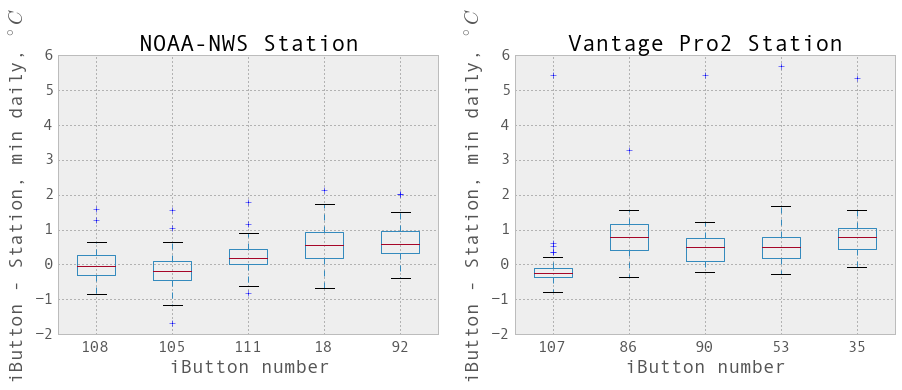

In [23]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,2)
n = [107, 86, 90, 53, 35]
data = tempDF[startdate:enddate][n].resample('D', how = 'min') - np.tile(olinhalldf[startdate:enddate].resample('D', how = 'min').outTemp, [tempDF[startdate:enddate][n].resample('D', how = 'min').shape[1],1]).T
handle = data.boxplot(return_type='axes')
plt.xlabel('iButton number')
plt.ylabel('iButton - Station, min daily, $ ^\circ C$')
plt.title('Vantage Pro2 Station')
a = plt.ylim([-2, 6])

plt.subplot(1,2,1)
m = [108, 105, 111, 18, 92]
data = tempDF[startdate:enddate][m].resample('D', how = 'min') - np.tile(urbandf[startdate:enddate].resample('D', how = 'min').TEMP, [tempDF[startdate:enddate][m].resample('D', how = 'min').shape[1],1]).T
handle = data.boxplot(return_type='axes')
plt.xlabel('iButton number')
plt.ylabel('iButton - Station, min daily, $ ^\circ C$')
plt.title('NOAA-NWS Station')
a = plt.ylim([-2, 6])

In [18]:
matplotlib.rcParams.update({'font.size': 16})